In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast 
import re
from scipy.stats import chi2

In [27]:
file_name1 = r'C:\Users\zinhyeok\Developer\gbottomup\results\multi_point_GraphStep\20250905_115314\multiple_test_modelsingle1-1_d500_frequency_50_20250905_115314.csv'

In [28]:
df = pd.read_csv(file_name1)

In [29]:
degrees_of_freedom = 2
threshold = chi2.ppf(1 - 0.05, degrees_of_freedom)

In [30]:
threshold

np.float64(5.991464547107979)

In [31]:
unique_models = df['model'].unique()
unique_models

array(['alpha_0.05c_2_topk_minobs4_numcp1',
       'alpha_0.05c_2_topk_minobs6_numcp1',
       'alpha_0.05c_2_topk_minobs8_numcp1',
       'alpha_0.05c_2_topk_minobs10_numcp1'], dtype=object)

In [ ]:
model_name_mapping = {
'alpha_0.05c_2_topk_minobs4_numcp1': 'Model A',
'alpha_0.05c_2_topk_minobs6_numcp1': 'Model B',
'alpha_0.05c_2_topk_minobs8_numcp1': 'Model C',
'alpha_0.05c_2_topk_minobs10_numcp1': 'Model D',
}

In [33]:
def parse_and_extract_cps(tree_string, threshold_value):
    """
    G_bottomup_tree의 문자열을 파싱하여 딕셔너리로 변환한 후,
    value가 임계값을 넘는 cp를 set으로 추출하는 함수.
    """
    significant_cps = set()
    try:
        # np.float64() 부분을 제거하여 ast.literal_eval이 처리할 수 있도록 함
        # 정규 표현식을 사용하여 더 안전하게 제거
        parsable_string = re.sub(r'np\.float64\((.*?)\)', r'\1', tree_string)
        
        # 문자열을 실제 딕셔너리로 변환
        tree_dict = ast.literal_eval(parsable_string)

        # 이전과 동일한 로직 적용
        if isinstance(tree_dict, dict):
            for item_list in tree_dict.values():
                for cp, value in item_list:
                    if value >= threshold_value:
                        significant_cps.add(cp)
    except (ValueError, SyntaxError) as e:
        # 문자열이 비어있거나 형식이 잘못된 경우 오류를 출력하고 빈 set 반환
        # print(f"파싱 오류 발생: {tree_string}, 오류: {e}")
        pass
    return significant_cps

In [34]:
df['significant_cps'] = df['G_bottomup_tau'].apply(lambda x: parse_and_extract_cps(x, threshold))

In [35]:
df.head()

,scenario,seed,model,True_tau,G_multi_tau,G_bottomup_candidates,G_bottomup_tau,G_multi_n_cps,G_bottomup_n_cps,G_multi_recall,G_bottomup_recall,G_multi_ari,G_bottomup_ari,significant_cps
0,modelsingle1-1,0,alpha_0.05c_2_topk_minobs4_numcp1,[99],"[4, 46, 50, 58, 72, 99, 133, 159]","[1, 5, 19, 25, 43, 49, 59, 69, 99, 123, 135, 1...",[99],8,1,1.0,1.0,0.308997,1.000000,{}
1,modelsingle1-1,0,alpha_0.05c_2_topk_minobs6_numcp1,[99],"[4, 46, 50, 58, 72, 99, 133, 159]","[41, 56, 104, 110, 128, 143, 161]",[110],8,1,1.0,1.0,0.308997,0.791060,{}
2,modelsingle1-1,0,alpha_0.05c_2_topk_minobs8_numcp1,[99],"[4, 46, 50, 58, 72, 99, 133, 159]","[35, 67, 75, 87, 91, 99, 131, 139, 187]",[91],8,1,1.0,1.0,0.308997,0.845631,{}
3,modelsingle1-1,0,alpha_0.05c_2_topk_minobs10_numcp1,[99],"[4, 46, 50, 58, 72, 99, 133, 159]","[4, 14, 24, 44, 49, 69, 99, 104, 144, 159, 169]",[104],8,1,1.0,1.0,0.308997,0.902008,{}
4,modelsingle1-1,1,alpha_0.05c_2_topk_minobs4_numcp1,[99],[99],"[9, 45, 69, 71, 97, 133, 155, 193]",[97],1,1,1.0,1.0,1.000000,0.960200,{}


In [36]:
# 그룹 1: 매핑된 모델들 (G_bottomup 결과 사용)
# 매핑 딕셔너리에 있는 모델만 필터링합니다.
df_mapped = df[df['model'].isin(model_name_mapping.keys())].copy()
# 모델 이름을 새로운 이름으로 변경합니다.
df_mapped['model'] = df_mapped['model'].map(model_name_mapping)
# 분석에 사용할 열을 선택하고, 공통된 이름으로 변경합니다.
df_mapped = df_mapped[['seed', 'model', 'G_bottomup_n_cps', 'G_bottomup_ari']]
df_mapped.rename(columns={'G_bottomup_n_cps': 'n_cps', 'G_bottomup_ari': 'ari'}, inplace=True)

In [37]:
df_mapped

,seed,model,n_cps,ari
0,0,Model A,1,1.000000
4,1,Model A,1,0.960200
8,2,Model A,1,0.773280
12,3,Model A,1,0.960200
16,4,Model A,1,0.406978
...,...,...,...,...
380,95,Model A,1,0.921205
384,96,Model A,1,0.809048
388,97,Model A,1,0.575598
392,98,Model A,1,0.606525


In [38]:
# 그룹 2: SBS 베이스라인 모델 (G_multi 결과 사용)
# G_multi 결과는 seed 내에서 모두 동일하므로, seed별로 중복을 제거하여 한 번만 사용합니다.
df_sbs = df[['seed', 'G_multi_n_cps', 'G_multi_ari']].drop_duplicates().copy()
# 모델 이름을 'SBS'로 지정합니다.
df_sbs['model'] = 'SBS'
# 분석에 사용할 열의 이름을 공통된 이름으로 변경합니다.
df_sbs.rename(columns={'G_multi_n_cps': 'n_cps', 'G_multi_ari': 'ari'}, inplace=True)

In [39]:
df_final = pd.concat([df_mapped, df_sbs], ignore_index=True)

In [40]:
df_final

,seed,model,n_cps,ari
0,0,Model A,1,1.000000
1,1,Model A,1,0.960200
2,2,Model A,1,0.773280
3,3,Model A,1,0.960200
4,4,Model A,1,0.406978
...,...,...,...,...
195,95,SBS,5,0.476682
196,96,SBS,2,0.760718
197,97,SBS,5,0.455237
198,98,SBS,3,0.699650


In [41]:
# 평가지표 계산 (통합된 df_final 사용)
# 1. 변화점 탐지 개수
freq_counts = pd.crosstab(df_final['model'], df_final['n_cps'])

# 2. 평균 ARI
avg_ari = df_final.groupby('model')['ari'].mean()

# 3. 최고 성능 비율 (% best)
best_performers = df_final.loc[df_final.groupby('seed')['ari'].idxmax()]
total_seeds = df_final['seed'].nunique()
percent_best = (best_performers['model'].value_counts() / total_seeds) * 100

In [42]:
# --- 4. 최종 결과 출력 ---
print("="*60)
print("     SBS 베이스라인 포함 최종 평가지표 분석 결과")
print("="*60)

print("\n## 1. 모델별 변화점 탐지 개수 (Frequency Counts)\n")
print(freq_counts)

print("\n" + "-"*60 + "\n")

# 요약 데이터프레임 생성
summary_df = pd.DataFrame(avg_ari).rename(columns={'ari': 'Average ARI'})
summary_df['% best'] = percent_best
summary_df['% best'] = summary_df['% best'].fillna(0)

print("## 2 & 3. 모델별 평균 ARI 및 최고 성능 비율 (% best)\n")
print(summary_df.sort_values(by='Average ARI', ascending=False))

print("="*60)


     SBS 베이스라인 포함 최종 평가지표 분석 결과

## 1. 모델별 변화점 탐지 개수 (Frequency Counts)

n_cps      1   2   3   4   5  6  8
model                             
Model A  100   0   0   0   0  0  0
SBS       10  25  24  15  19  6  1

------------------------------------------------------------

## 2 & 3. 모델별 평균 ARI 및 최고 성능 비율 (% best)

         Average ARI  % best
model                       
Model A     0.699815    56.0
SBS         0.672174    44.0


In [43]:
freq_counts

n_cps,1,2,3,4,5,6,8
model,,,,,,,
Model A,100,0,0,0,0,0,0
SBS,10,25,24,15,19,6,1


In [44]:
summary_df

,Average ARI,% best
model,,
Model A,0.699815,56.0
SBS,0.672174,44.0


In [45]:
final_summary = pd.concat([freq_counts, summary_df], axis=1)
final_summary

,1,2,3,4,5,6,8,Average ARI,% best
model,,,,,,,,,
Model A,100,0,0,0,0,0,0,0.699815,56.0
SBS,10,25,24,15,19,6,1,0.672174,44.0


In [46]:
model_order = [
    'SBS',
    'Model A'
]

In [47]:
final_summary = final_summary.reindex(model_order)
final_summary = final_summary.round(3)

In [48]:
final_summary

,1,2,3,4,5,6,8,Average ARI,% best
model,,,,,,,,,
SBS,10,25,24,15,19,6,1,0.672,44.0
Model A,100,0,0,0,0,0,0,0.700,56.0


In [49]:
output_filename = 'analysis_results_final.csv'
final_summary.to_csv(output_filename, index=False)

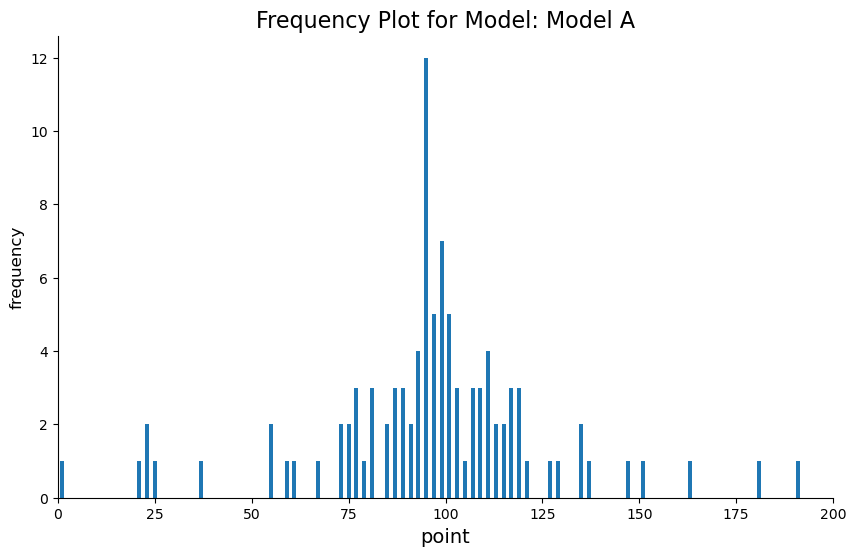

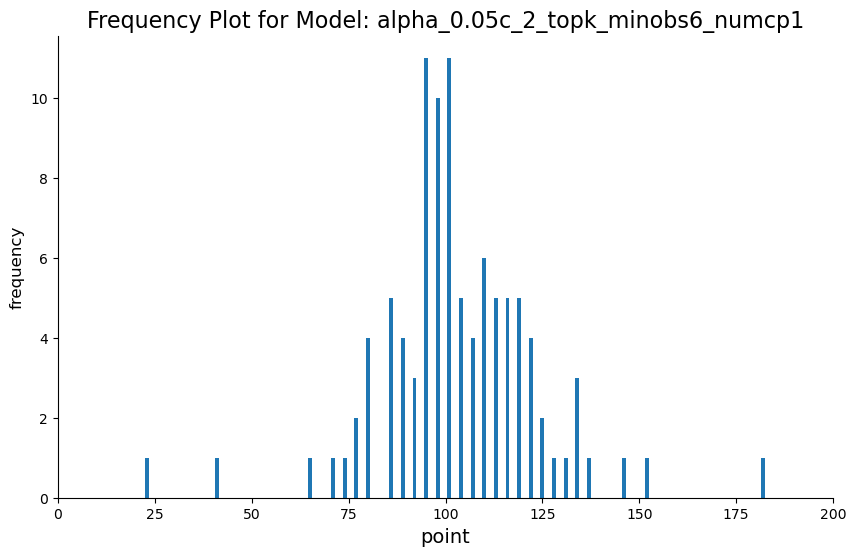

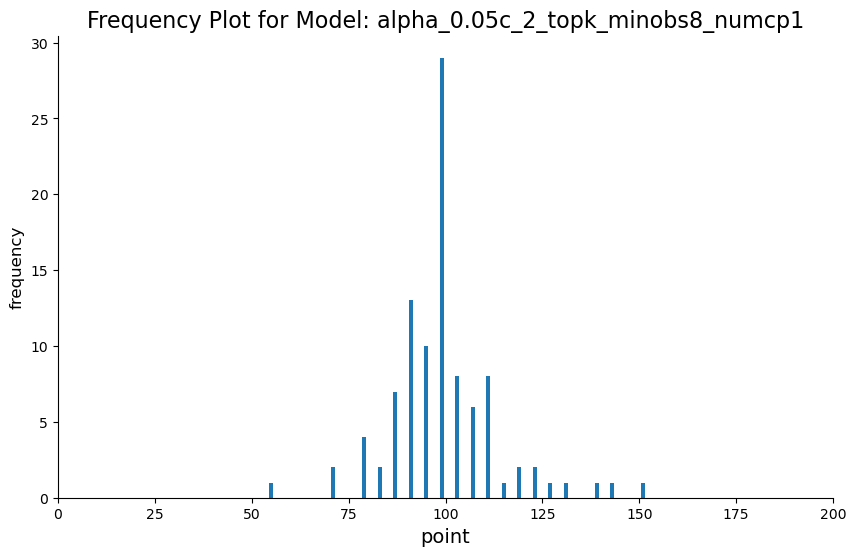

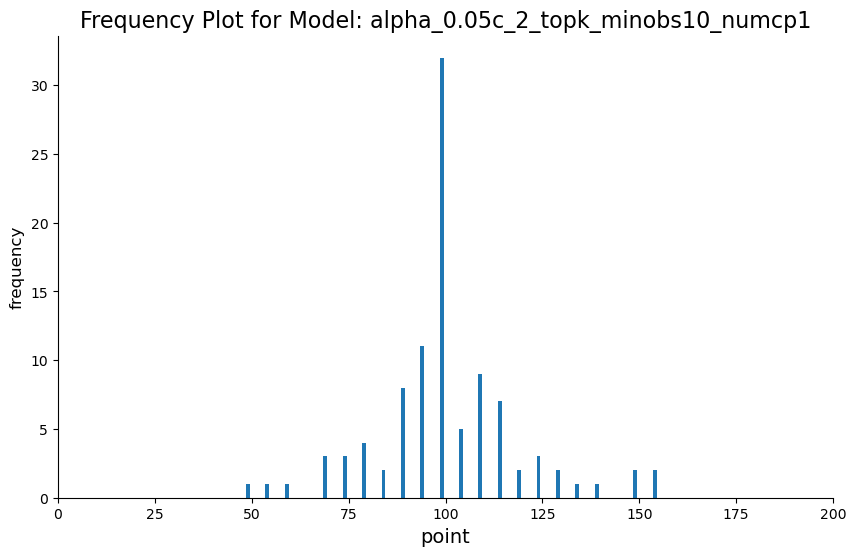

In [50]:
for model_name in unique_models:
    # 3. 특정 모델에 해당하는 데이터 필터링 및 처리
    model_df = df[df['model'] == model_name].copy()

    # --- 오류 수정 코드 ---
    # G_bottomup_tau 열의 각 항목이 문자열인 경우, ast.literal_eval을 사용해
    # 안전하게 실제 리스트 객체로 변환합니다.
    def safe_literal_eval(item):
        if isinstance(item, str):
            try:
                return ast.literal_eval(item)
            except (ValueError, SyntaxError):
                # 변환에 실패하면(예: 잘못된 형식의 문자열) NaN으로 처리
                return np.nan
        # 이미 리스트이거나 다른 타입이면 그대로 반환
        return item

    model_df['G_bottomup_tau'] = model_df['G_bottomup_tau'].apply(safe_literal_eval)
    # --- 수정 완료 ---

    # 'G_bottomup_tau' 열의 리스트들을 하나의 시리즈로 펼칩니다.
    all_cps_values = model_df['G_bottomup_tau'].explode()
    
    # NaN 값을 제거하고 정수형으로 변환합니다.
    # 이 시점에서는 모든 값이 숫자이거나 NaN이므로 int 변환이 안전합니다.
    all_cps_values = all_cps_values.dropna().astype(int)
    
    # 4. 각 값의 빈도수 계산
    value_counts = all_cps_values.value_counts().sort_index()
    
    # # --- 확인용 출력 ---
    # print(f"\n--- Model: {model_name} 빈도수 계산 결과 ---")
    # print(value_counts)
    # print("------------------------------------")
    
    # 5. 시각화
    # 빈도수 데이터가 없는 경우 그래프를 그리지 않고 건너뜁니다.
    if value_counts.empty:
        print(f"No data to plot for model: {model_name}")
        continue

    plt.figure(figsize=(10, 6))
    
    # 막대 그래프를 사용하여 빈도수 플롯 생성
    plt.bar(value_counts.index, value_counts.values, width=1)
    
    # 그래프 스타일 및 레이블 설정
    plt.ylabel('frequency', fontsize=12)
    plt.xlabel('point', fontsize=14)
    display_name = model_name_mapping.get(model_name, model_name)
    plt.title(f'Frequency Plot for Model: {display_name}', fontsize=16)
    
    # x축과 y축 범위 설정
    plt.xlim(0, 200)
    plt.ylim(bottom=0)
    
    # 그리드를 제거하고 축 선을 깔끔하게 정리
    plt.grid(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # 생성된 플롯 보이기
    plt.show()